In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import re

#### Import the data and get a high-level picture

In [2]:
df = pd.read_csv('sales.csv')
df.head()

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",01-01-18 11:30,3.5,3,10.5
1,10000,"""ICE CREAM"" Peanut Fudge",01-01-18 11:30,3.5,1,3.5
2,10001,"""SORBET"" Raspberry",01-01-18 12:14,2.5,2,5.0
3,10001,NaN,01-01-18 12:14,1.5,1,1.5
4,10001,"""CONE"" Dipped Waffle Cone",01-01-18 12:14,3.5,1,3.5


In [3]:
df.shape

(29922, 6)

In [4]:
df.dtypes

order_id        int64
name           object
ordered_at     object
price         float64
quantity        int64
line_total    float64
dtype: object

#### TODO: Fix column datatypes

Change ordered_at to datetime

Change price and line_total to float

In [5]:
df['ordered_at'] = pd.to_datetime(df['ordered_at'])

In [8]:
df['price'] = df['price'].astype(float)

In [9]:
df['line_total'] = df['line_total'].astype(float)

In [10]:
df.dtypes

order_id               int64
name                  object
ordered_at    datetime64[ns]
price                float64
quantity               int64
line_total           float64
dtype: object

#### TODO: drop if duplicated or null

In [11]:
df[df.duplicated()].shape[0]

538

In [14]:
display(df.drop_duplicates())

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,3,10.5
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,1,3.5
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:00,2.5,2,5.0
3,10001,NaN,2018-01-01 12:14:00,1.5,1,1.5
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:00,3.5,1,3.5
...,...,...,...,...,...,...
29817,19997,"""CONE"" Waffle Cone",2018-07-28 17:40:00,4.0,3,12.0
29818,19997,"""SORBET"" Blood Orange",2018-07-28 17:40:00,2.5,3,7.5
29819,19998,"""SORBET"" Lychee",2018-07-28 18:21:00,3.0,1,3.0
29820,19998,"""ICE CREAM"" Rocky Road",2018-07-28 18:21:00,3.5,1,3.5


In [12]:
df.isnull().sum()

order_id         0
name          1488
ordered_at       0
price            0
quantity         0
line_total       0
dtype: int64

In [13]:
df[df['name'].isnull()].head()

,order_id,name,ordered_at,price,quantity,line_total
3,10001,NaN,2018-01-01 12:14:00,1.5,1,1.5
6,10002,NaN,2018-01-01 12:23:00,3.0,3,9.0
27,10007,NaN,2018-01-01 15:03:00,2.5,1,2.5
77,10026,NaN,2018-02-01 03:25:00,0.5,2,1.0
88,10031,NaN,2018-02-01 05:45:00,3.5,3,10.5


#### Sanity check for value ranges and to check assumptions

In [15]:
df[(df['price'] * df['quantity']) != df['line_total']].shape[0]

29

In [16]:
df[df['line_total'] < 0].shape[0]

282

#### TODO: 
Set line_total = price * quantity if different
Remove if line total < 0

In [22]:
df.drop(df[df['line_total'] < 0].index, inplace = True)

In [23]:
df.describe()

,order_id,price,quantity,line_total
count,29640.000000,29640.000000,29640.000000,29640.000000
mean,14993.736471,2.511404,2.001822,5.029335
std,2888.381430,1.060330,0.819560,3.085974
min,10000.000000,0.500000,1.000000,0.000000
25%,12504.000000,1.500000,1.000000,2.500000
50%,14973.000000,2.500000,2.000000,4.500000
75%,17506.000000,3.500000,3.000000,7.500000
max,19999.000000,4.000000,3.000000,12.000000


#### TODO: Get value between "" in name and put it in category column

In [69]:
df[['category', 'flavour']] = df["name"].apply(lambda x: pd.Series(str(x).split("\" "))) 

In [71]:
df.head(15)

,order_id,name,ordered_at,price,quantity,line_total,category,flavour
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,3,10.5,"""ICE CREAM",Peanut Fudge
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,1,3.5,"""ICE CREAM",Peanut Fudge
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:00,2.5,2,5.0,"""SORBET",Raspberry
3,10001,NaN,2018-01-01 12:14:00,1.5,1,1.5,nan,NaN
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:00,3.5,1,3.5,"""CONE",Dipped Waffle Cone
5,10002,"""SORBET"" Lychee",2018-01-01 12:23:00,3.0,1,3.0,"""SORBET",Lychee
6,10002,NaN,2018-01-01 12:23:00,3.0,3,9.0,nan,NaN
7,10002,"""ICE CREAM"" Earl Gray",2018-01-01 12:23:00,0.5,3,1.5,"""ICE CREAM",Earl Gray
8,10003,"""ICE CREAM"" Matcha",2018-01-01 12:49:00,1.5,3,4.5,"""ICE CREAM",Matcha
9,10004,"""BEVERAGE"" Iced Coffee",2018-01-01 13:22:00,2.5,2,5.0,"""BEVERAGE",Iced Coffee


#### Analysis, finally!

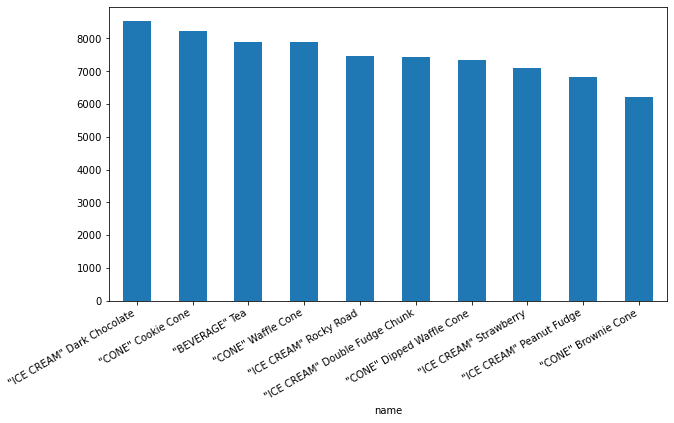

In [17]:
f, ax = plt.subplots(figsize=(10, 6))
df.groupby('name')['line_total'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
f.autofmt_xdate()
plt.show()